### Nama: Andika indra kirana
### Nim: 2602204405
### Mata Kuliah: Data Science

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

Pengulangan Menggunakan while 

In [2]:
list = []
while True:
    angka = int(input("Masukkan angka (negatif untuk berhenti): "))
    if angka < 0:
        break
    list.append(angka)

print("Angka yang telah dimasukkan:", list)

Angka yang telah dimasukkan: [4, 3, 2, 6, 7]


Diagram Histogram untuk Nilai Ujian Soal

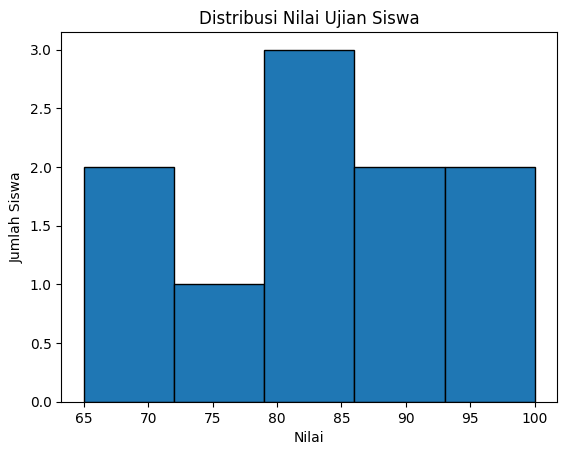

In [3]:
import matplotlib.pyplot as plt

nilai = [85, 95, 80, 70, 65, 90, 100, 78, 82, 88]

plt.hist(nilai, bins=5, edgecolor='black')  

plt.xlabel('Nilai')
plt.ylabel('Jumlah Siswa')
plt.title('Distribusi Nilai Ujian Siswa')

plt.show()


Pengujian Overfitting dan Underfitting

In [4]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data nilai ujian dan indeks siswa sebagai variabel x
x = np.arange(1, 11).reshape(-1, 1)  # Indeks siswa (1-10)
y = np.array([85, 95, 80, 70, 65, 90, 100, 78, 82, 88])  # Nilai ujian siswa

# Model regresi polynomial derajat 1 (linear)
poly_1 = PolynomialFeatures(degree=1)
x_poly_1 = poly_1.fit_transform(x)
model_1 = LinearRegression().fit(x_poly_1, y)
y_pred_1 = model_1.predict(x_poly_1)
r2_1 = r2_score(y, y_pred_1)

# Model regresi polynomial derajat 3
poly_3 = PolynomialFeatures(degree=3)
x_poly_3 = poly_3.fit_transform(x)
model_3 = LinearRegression().fit(x_poly_3, y)
y_pred_3 = model_3.predict(x_poly_3)
r2_3 = r2_score(y, y_pred_3)

r2_1, r2_3


(0.00490698332909989, 0.16533814578318962)

Model derajat 1 cenderung underfit, karena model yang terlalu sederhana sedangkan
Model derajat 3 tidak mengalami overfitting dan menangkap pola lebih baik, menunjukkan peningkatan performa dengan fleksibilitas yang wajar tanpa terlalu mengikuti fluktuasi data.

membangun model Naïve Bayes

In [5]:
email = pd.DataFrame({
    "Email_ID": [1,2,3,4,5,6,7,8,9,10],
    "Text": ["Congratulations, you've won a lottery!","Your invoice is attached.","Click here to claim your prize.","Meeting rescheduled to next week.","Free entry in a prize draw!","Let's catch up over coffee.","Get paid cash for taking surveys!","Your appointment is confirmed.","This isn't a scam, just a great opportunity!","Reminder: your subscription will expire soon."],
    "Label": ["Spam","Not Spam","Spam","Not Spam","Spam","Not Spam","Spam","Not Spam","Spam","Not Spam"]
})

In [6]:
email.to_csv('emails.csv', index=False)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

Membaca Dataset: Load dataset menggunakan Pandas dan lakukan prapemrosesan teks, seperti penghilangan tanda baca dan konversi ke huruf
kecil.

In [8]:
Df = pd.read_csv('emails.csv')
Df

,Email_ID,Text,Label
0,1,"Congratulations, you've won a lottery!",Spam
1,2,Your invoice is attached.,Not Spam
2,3,Click here to claim your prize.,Spam
3,4,Meeting rescheduled to next week.,Not Spam
4,5,Free entry in a prize draw!,Spam
5,6,Let's catch up over coffee.,Not Spam
6,7,Get paid cash for taking surveys!,Spam
7,8,Your appointment is confirmed.,Not Spam
8,9,"This isn't a scam, just a great opportunity!",Spam
9,10,Reminder: your subscription will expire soon.,Not Spam


In [9]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

Df['Processed_Text'] = Df['Text'].apply(preprocess_text)

Gunakan CountVectorizer untuk mengubah teks menjadi
representasi fitur.

In [10]:
Cv = CountVectorizer()
X= Cv.fit_transform(Df['Processed_Text'])

Membagi Dataset: Bagi dataset menjadi dua bagian: 80% untuk data
pelatihan dan 20% untuk data pengujian.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,  Df['Label'], test_size=0.2, random_state=42)

Buat model Naïve Bayes menggunakan MultinomialNB dari
scikit-learn.

In [12]:
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test)

Hitung akurasi model pada data pengujian.

In [14]:
Akurasi = accuracy_score(Y_test, y_pred)
print("Akurasi: ", Akurasi)

Akurasi:  0.5


Tampilkan confusion matrix dan classification report.

In [15]:
C_matrix = confusion_matrix(Y_test, y_pred)
Data_C_matrix = pd.DataFrame(C_matrix, index=['ham','spam'], columns=['ham','spam'])
print("\nConfusion Matrix:\n", Data_C_matrix)


Confusion Matrix:
       ham  spam
ham     1     0
spam    1     0


fungsi untuk mengklasifikasikan email baru
yang diberikan sebagai spam atau tidak spam. Email baru yang masuk
adalah “Your package is out for delivery and will arrive next week.",
tentukan apakah email ini termasuk spam/not spam.

In [16]:
def classify_new_email(new_email):
    new_email_processed = preprocess_text(new_email)
    new_email_vec = Cv.transform([new_email_processed])
    prediction = model.predict(new_email_vec)
    return "Spam" if prediction[0] == 1 else "Not Spam"
new_email = "Your package is out for delivery and will arrive next week."
classification = classify_new_email(new_email)

print(f"\nThe new email is classified as: {classification}")


The new email is classified as: Not Spam
